In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)

from fredapi import Fred

fred_key = 'b3a24b7f5fec528be7a29d7e67827ddf'

# 1. Creating the Fred Object

In [57]:
fred = Fred(api_key=fred_key)

# 2. Searching for economic data

In [58]:
sp_search = fred.search('S&P', order_by='popularity')

In [59]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-03-16,2023-03-16,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-03-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-16 09:36:05-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-03-16,2023-03-16,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-02-28 08:02:02-06:00,90,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-03-16,2023-03-16,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-03-15,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-03-16 09:36:09-05:00,84,This data represents the effective yield of th...
SP500,SP500,2023-03-16,2023-03-16,S&P 500,2013-03-18,2023-03-15,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-03-15 19:10:57-05:00,83,The observations for the S&P 500 represent the...
CSUSHPISA,CSUSHPISA,2023-03-16,2023-03-16,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2022-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-02-28 08:02:04-06:00,81,"For more information regarding the index, plea..."


# 3. Pulling raw data

<Axes: title={'center': 'S&P 500'}>

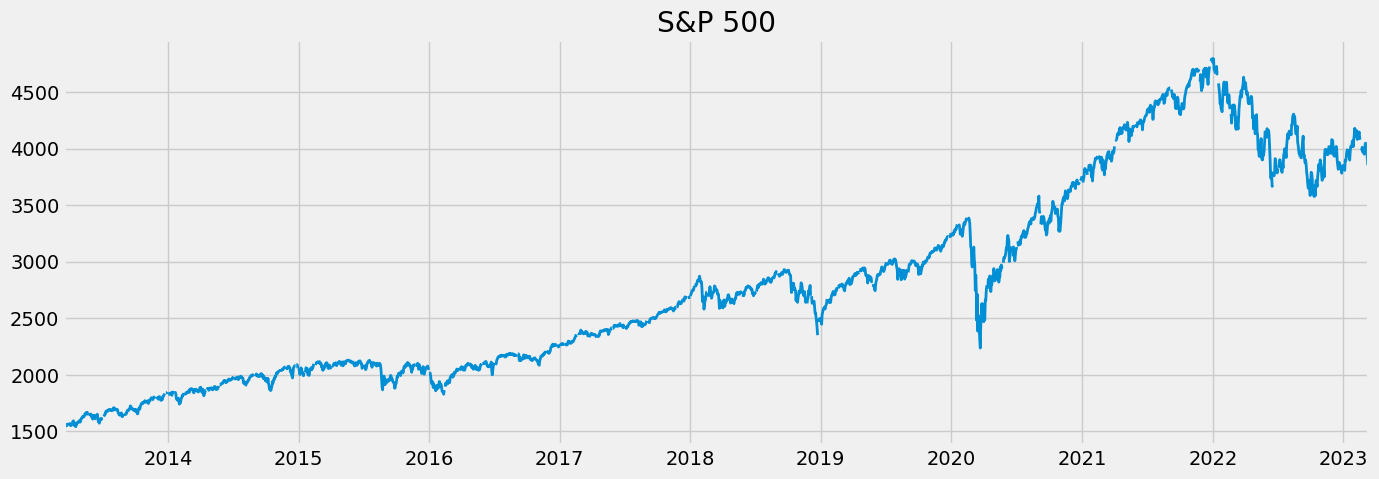

In [60]:
sp500 = fred.get_series(series_id='SP500')
sp500.plot(figsize=(15,5), title='S&P 500', lw=2)

# 4. Pull and Join multiple Data Series

In [61]:
unamp_results = fred.search('unemployment')

In [62]:
unrate = fred.get_series('UNRATE')

In [63]:
unamp_results.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2023-03-16,2023-03-16,Unemployment Rate,1948-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-10 07:44:02-06:00,93,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2023-03-16,2023-03-16,Unemployment Rate,1948-01-01,2023-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2023-03-10 07:43:02-06:00,58,The unemployment rate represents the number of...
NROU,NROU,2023-03-16,2023-03-16,Noncyclical Rate of Unemployment,1949-01-01,2032-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2022-05-26 13:45:04-05:00,68,"Starting with the July, 2021 report: An Update..."
UNEMPLOY,UNEMPLOY,2023-03-16,2023-03-16,Unemployment Level,1948-01-01,2023-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2023-03-10 07:44:07-06:00,69,The series comes from the 'Current Population ...
CCSA,CCSA,2023-03-16,2023-03-16,Continued Claims (Insured Unemployment),1967-01-07,2023-03-04,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2023-03-16 07:33:03-05:00,71,"Continued claims, also referred to as insured ..."


<Axes: title={'center': 'Unemployment Rate'}>

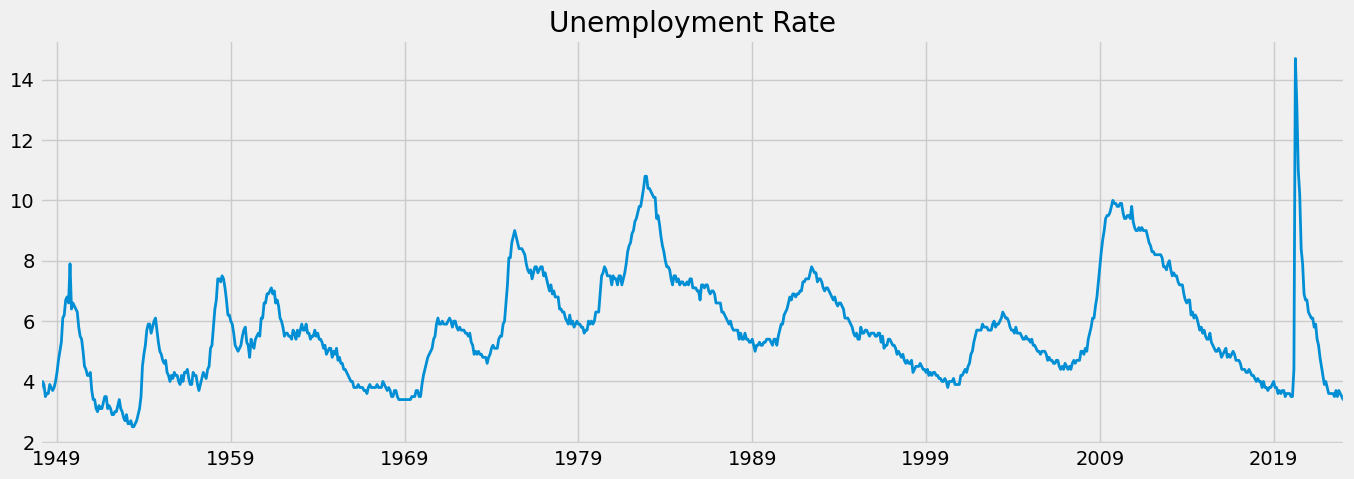

In [64]:
unrate.plot(figsize=(15,5), title='Unemployment Rate', lw=2)

In [65]:
unemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))

In [66]:
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [67]:
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [68]:
all_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
unemp_results = pd.concat(all_results, axis=1).drop(['M0892BUSM156SNBR','M0892AUSM156SNBR','U2RATE'],axis=1)

In [69]:
unemp_states = unemp_results.drop('UNRATE', axis=1)
unemp_states = unemp_states.dropna()

In [70]:
unemp_states

,LNS14000006,CAUR,FLUR,TXUR,NYUR,LNS14000002,LNS14000031,LNS14000024,LNS14000009,LNS14027662,LNS14000001,LNS14027660,PAUR,OHUR,NCUR,LNS14000003,ALUR,MIUR,ILUR,KYUR,MNUR,COUR,GAUR,WIUR,NJUR,WAUR,VAUR,MAUR,WVUR,TNUR,LRUN64TTUSM156S,SCUR,AKUR,ARUR,ORUR,NMUR,LNS14032183,LNS14027659,AZUR,LNS14000012,UTUR,INUR,OKUR,NDUR,IAUR,MOUR,LASMT261982000000003,LNS14024887,NVUR,MDUR,KSUR,LNS14000060,PRUR,MTUR,LAUR,MSUR,WYUR,LNS14000036,LNS14000018,RIUR,CTUR,HIUR,LNS14000032,SDUR,IDUR,MEUR,DCUR,NHUR,LRHUTTTTUSM156S,DEUR,NEUR,LASMT391746000000003,LNS14000028,LNS14024230,CMWRUR,VTUR,LNS14027689,LNS14000315,LRUN24TTUSM156S,LRUNTTTTUSM156S,LNS14000029,CSOUUR,CNERUR,LNS14200000,LNS14000025,LNS14000150,CWSTUR,LNS14000061,LNS14000089,LNS14000026,LNS14000048,LNS14000093
2003-01-01,10.5,6.9,4.7,6.7,6.3,5.4,10.4,5.2,7.9,3.0,6.2,5.2,5.8,6.0,6.8,5.2,5.9,6.5,6.6,6.0,4.5,5.9,5.3,5.5,5.9,7.2,4.4,5.6,6.7,5.1,5.928194,6.9,7.5,5.4,7.6,5.6,5.5,8.8,6.0,17.2,5.8,5.0,5.1,3.5,4.2,5.4,6.7,12.0,5.5,4.7,5.1,4.8,11.9,4.6,6.1,6.4,4.4,9.4,30.7,5.7,5.2,3.7,8.6,3.3,5.5,5.0,7.0,4.6,5.8,4.4,3.8,5.2,5.0,4.1,5.6,4.4,4.7,3.5,12.0,5.8,4.2,5.7,5.8,5.4,5.6,3.6,6.6,5.1,6.0,4.9,4.7,3.9
2003-02-01,10.7,6.9,4.7,6.7,6.3,5.6,10.3,5.3,7.7,3.0,6.1,5.4,5.8,6.2,6.8,5.1,5.9,6.8,6.6,6.1,4.5,6.0,5.3,5.6,5.9,7.3,4.4,5.7,6.7,5.2,5.957387,6.9,7.6,5.5,7.8,5.7,5.8,8.9,5.9,17.2,5.8,5.0,5.2,3.5,4.3,5.5,7.0,12.1,5.4,4.8,5.2,5.0,12.1,4.6,6.2,6.4,4.5,9.5,31.6,5.7,5.3,3.7,9.1,3.3,5.6,5.1,7.1,4.5,5.9,4.5,3.8,5.3,4.8,3.9,5.7,4.4,4.7,3.7,12.1,5.9,4.3,5.7,5.9,5.5,5.5,3.7,6.6,5.1,5.8,5.1,4.8,4.0
2003-03-01,10.3,6.9,4.6,6.8,6.3,5.7,9.6,5.3,7.8,3.1,6.1,5.5,5.8,6.3,6.8,5.1,5.9,7.0,6.6,6.2,4.6,6.1,5.3,5.7,5.9,7.3,4.4,5.7,6.7,5.3,5.983306,7.0,7.6,5.6,8.0,5.7,6.5,8.6,5.9,17.8,5.7,5.1,5.4,3.5,4.4,5.5,7.2,12.0,5.4,4.8,5.3,5.0,12.3,4.7,6.4,6.4,4.5,9.1,33.9,5.7,5.4,3.8,8.7,3.4,5.6,5.2,7.2,4.5,5.9,4.5,3.9,5.4,4.7,3.9,5.8,4.5,4.8,3.8,12.0,5.9,4.4,5.8,5.9,5.5,5.4,3.8,6.6,5.1,5.8,5.1,4.8,4.4
2003-04-01,10.9,7.0,4.6,6.9,6.4,5.7,10.6,5.4,7.6,3.0,6.4,5.7,5.8,6.3,6.8,5.3,6.0,7.2,6.7,6.3,4.7,6.2,5.3,5.7,5.9,7.3,4.4,5.8,6.8,5.5,6.157087,7.1,7.7,5.7,8.2,5.8,6.0,8.5,5.9,17.7,5.6,5.2,5.5,3.5,4.5,5.6,7.3,12.6,5.4,4.9,5.4,5.0,12.4,4.7,6.5,6.4,4.5,10.2,32.1,5.7,5.5,3.9,9.2,3.4,5.6,5.2,7.3,4.4,6.0,4.6,4.0,5.5,5.1,4.2,5.9,4.5,4.8,3.6,12.6,6.0,4.3,5.8,5.9,5.5,5.7,3.9,6.7,5.2,5.9,5.1,4.9,4.2
2003-05-01,10.9,7.0,4.6,6.9,6.4,5.7,11.1,5.5,8.0,3.0,6.4,5.6,5.8,6.4,6.9,5.4,6.0,7.3,6.8,6.4,4.8,6.3,5.3,5.8,6.0,7.4,4.4,5.8,6.8,5.6,6.180193,7.2,7.7,5.8,8.3,5.9,5.5,9.0,5.9,17.9,5.6,5.2,5.6,3.5,4.5,5.7,7.5,12.9,5.4,4.9,5.6,5.1,12.4,4.7,6.6,6.4,4.4,10.4,36.1,5.6,5.5,4.0,8.4,3.5,5.7,5.3,7.3,4.5,6.1,4.6,4.0,5.6,5.1,4.3,6.0,4.5,4.9,3.7,12.9,6.1,4.6,5.9,5.9,5.5,5.8,3.9,6.7,5.3,6.1,5.2,4.9,4.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,5.9,4.6,3.0,4.3,4.5,3.5,6.1,3.4,4.2,2.0,3.8,3.8,4.8,4.0,3.4,3.2,2.8,4.3,4.6,3.9,2.2,3.6,3.1,2.8,4.1,4.1,3.0,4.1,3.6,3.2,3.621426,3.3,4.8,3.2,3.7,5.3,3.1,5.4,3.2,10.2,1.9,2.2,2.7,2.8,3.0,3.4,3.8,7.9,5.0,4.2,2.4,3.1,6.4,2.3,4.1,4.1,3.3,6.9,14.8,3.2,4.4,4.1,5.1,2.3,2.6,3.3,5.8,2.3,3.6,4.5,1.9,4.9,3.1,2.8,3.5,2.5,3.1,2.1,7.9,3.6,2.8,3.6,4.4,4.3,3.5,1.9,4.1,3.1,4.0,3.2,3.0,2.2
2022-05-01,6.2,4.3,2.9,4.2,4.4,3.7,5.7,3.4,4.4,2.0,3.6,3.8,4.6,3.9,3.4,3.2,2.7,4.3,4.6,3.8,2.0,3.5,3.0,2.9,3.9,3.9,3.0,3.9,3.5,3.3,3.621825,3.3,4.6,3.2,3.5,5.1,2.4,5.2,3.2,10.5,2.0,2.2,2.8,2.6,2.7,3.1,3.6,7.9,4.9,4.0,2.3,3.1,6.2,2.4,4.0,3.9,3.2,6.7,18.6,2.9,4.2,4.1,5.9,2.3,2.5,3.2,5.7,2.1,3.6,4.5,1.9,4.8,3.1,2.7,3.4,2.3,3.4,2.3,7.9,3.6,2.9,3.5,4.2,4.3,3.4,2.0,4.0,3.0,3.9,3.4,3.0,2.3
2022-06-01,5.9,4.2,2.8,4.1,4.4,3.6,5.3,3.3,4.3,2.1,3.6,3.6,4.5,3.9,3.4,3.3,2.6,4.3,4.5,3.7,1.8,3.4,2.9,2.9,3.9,3.8,2.8,3.7,3.6,3.3,3.666970,3.2,4

In [71]:
# drop the columns from unemp_states that starts with L
unemp_states = unemp_states.loc[:, ~unemp_states.columns.str.startswith('L')]
px.line(unemp_states, title='Unemployment Rate by State')

# 5. Pulling May 2021 Unemployment rate per state

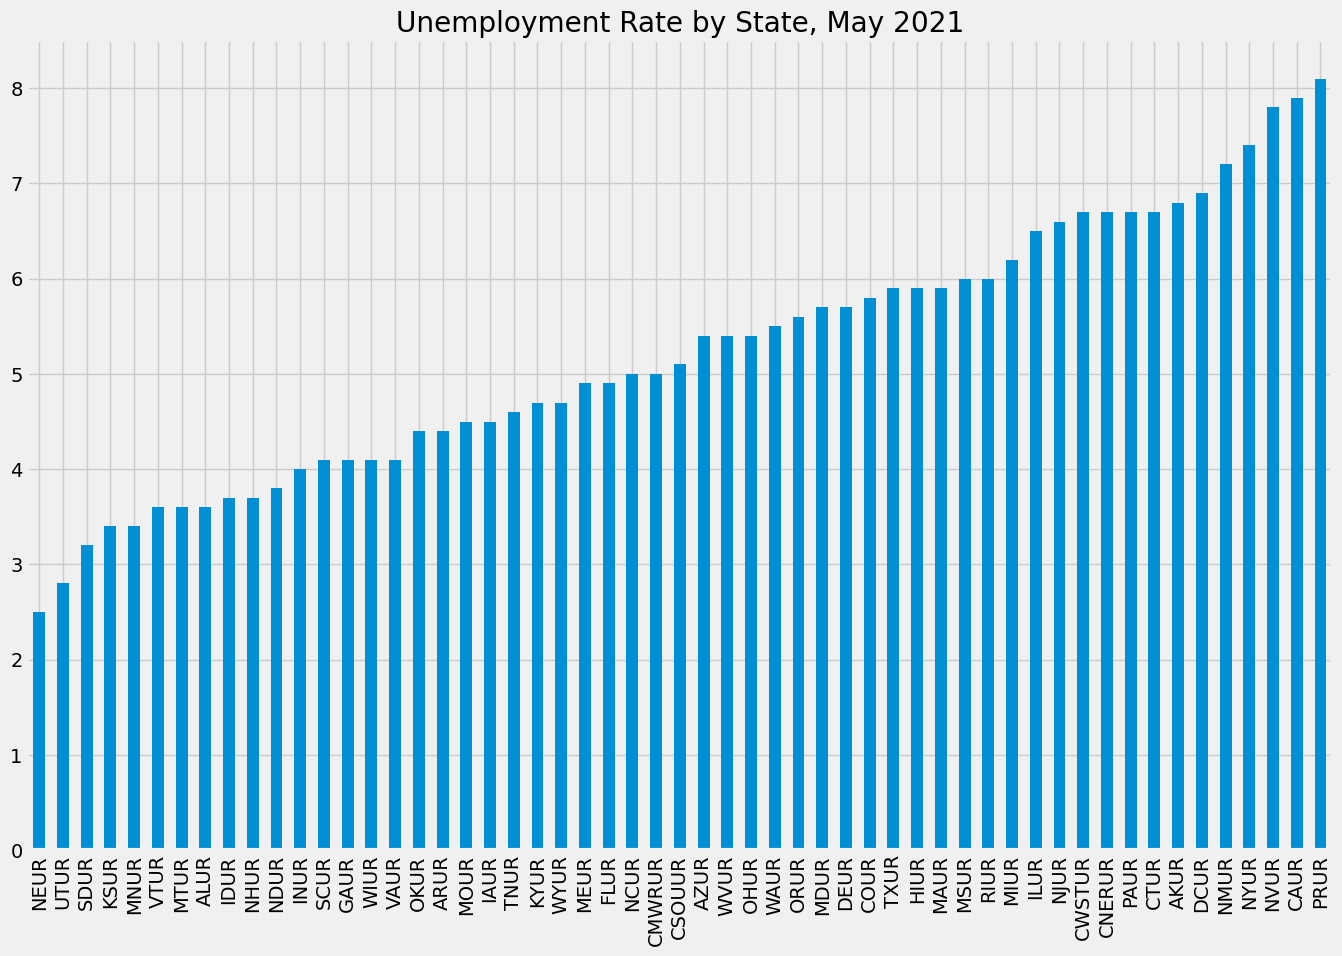

In [72]:
unemp_states.loc[unemp_states.index == '2021-05-01'].T.sort_values(by='2021-05-01')\
    .plot(kind='bar', figsize=(15,10), title='Unemployment Rate by State, May 2021', legend=False)
plt.show()

In [73]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in','')\
    .loc[~unemp_df.index.str.startswith('L')]\
        .drop(['M0892BUSM156SNBR','M0892AUSM156SNBR','U2RATE']).to_dict()
        
id_to_state

{'UNRATE': 'Unemployment Rate',
 'CAUR': ' California',
 'FLUR': ' Florida',
 'TXUR': ' Texas',
 'NYUR': ' New York',
 'PAUR': ' Pennsylvania',
 'OHUR': ' Ohio',
 'NCUR': ' North Carolina',
 'ALUR': ' Alabama',
 'MIUR': ' Michigan',
 'ILUR': ' Illinois',
 'KYUR': ' Kentucky',
 'MNUR': ' Minnesota',
 'COUR': ' Colorado',
 'GAUR': ' Georgia',
 'WIUR': ' Wisconsin',
 'NJUR': ' New Jersey',
 'WAUR': ' Washington',
 'VAUR': ' Virginia',
 'MAUR': ' Massachusetts',
 'WVUR': ' West Virginia',
 'TNUR': ' Tennessee',
 'SCUR': ' South Carolina',
 'AKUR': ' Alaska',
 'ARUR': ' Arkansas',
 'ORUR': ' Oregon',
 'NMUR': ' New Mexico',
 'AZUR': ' Arizona',
 'UTUR': ' Utah',
 'INUR': ' Indiana',
 'OKUR': ' Oklahoma',
 'NDUR': ' North Dakota',
 'IAUR': ' Iowa',
 'MOUR': ' Missouri',
 'NVUR': ' Nevada',
 'MDUR': ' Maryland',
 'KSUR': ' Kansas',
 'PRUR': ' Puerto Rico',
 'MTUR': ' Montana',
 'MSUR': ' Mississippi',
 'WYUR': ' Wyoming',
 'RIUR': ' Rhode Island',
 'CTUR': ' Connecticut',
 'HIUR': ' Hawaii',


In [74]:
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns]

In [75]:
unemp_states

,California,Florida,Texas,New York,Pennsylvania,Ohio,North Carolina,Alabama,Michigan,Illinois,Kentucky,Minnesota,Colorado,Georgia,Wisconsin,New Jersey,Washington,Virginia,Massachusetts,West Virginia,Tennessee,South Carolina,Alaska,Arkansas,Oregon,New Mexico,Arizona,Utah,Indiana,Oklahoma,North Dakota,Iowa,Missouri,Nevada,Maryland,Kansas,Puerto Rico,Montana,Mississippi,Wyoming,Rhode Island,Connecticut,Hawaii,South Dakota,Idaho,Maine,the District of Columbia,New Hampshire,Delaware,Nebraska,Midwest Census Region,Vermont,South Census Region,Northeast Census Region,West Census Region
2003-01-01,6.9,4.7,6.7,6.3,5.8,6.0,6.8,5.9,6.5,6.6,6.0,4.5,5.9,5.3,5.5,5.9,7.2,4.4,5.6,6.7,5.1,6.9,7.5,5.4,7.6,5.6,6.0,5.8,5.0,5.1,3.5,4.2,5.4,5.5,4.7,5.1,11.9,4.6,6.4,4.4,5.7,5.2,3.7,3.3,5.5,5.0,7.0,4.6,4.4,3.8,5.6,4.4,5.7,5.8,6.6
2003-02-01,6.9,4.7,6.7,6.3,5.8,6.2,6.8,5.9,6.8,6.6,6.1,4.5,6.0,5.3,5.6,5.9,7.3,4.4,5.7,6.7,5.2,6.9,7.6,5.5,7.8,5.7,5.9,5.8,5.0,5.2,3.5,4.3,5.5,5.4,4.8,5.2,12.1,4.6,6.4,4.5,5.7,5.3,3.7,3.3,5.6,5.1,7.1,4.5,4.5,3.8,5.7,4.4,5.7,5.9,6.6
2003-03-01,6.9,4.6,6.8,6.3,5.8,6.3,6.8,5.9,7.0,6.6,6.2,4.6,6.1,5.3,5.7,5.9,7.3,4.4,5.7,6.7,5.3,7.0,7.6,5.6,8.0,5.7,5.9,5.7,5.1,5.4,3.5,4.4,5.5,5.4,4.8,5.3,12.3,4.7,6.4,4.5,5.7,5.4,3.8,3.4,5.6,5.2,7.2,4.5,4.5,3.9,5.8,4.5,5.8,5.9,6.6
2003-04-01,7.0,4.6,6.9,6.4,5.8,6.3,6.8,6.0,7.2,6.7,6.3,4.7,6.2,5.3,5.7,5.9,7.3,4.4,5.8,6.8,5.5,7.1,7.7,5.7,8.2,5.8,5.9,5.6,5.2,5.5,3.5,4.5,5.6,5.4,4.9,5.4,12.4,4.7,6.4,4.5,5.7,5.5,3.9,3.4,5.6,5.2,7.3,4.4,4.6,4.0,5.9,4.5,5.8,5.9,6.7
2003-05-01,7.0,4.6,6.9,6.4,5.8,6.4,6.9,6.0,7.3,6.8,6.4,4.8,6.3,5.3,5.8,6.0,7.4,4.4,5.8,6.8,5.6,7.2,7.7,5.8,8.3,5.9,5.9,5.6,5.2,5.6,3.5,4.5,5.7,5.4,4.9,5.6,12.4,4.7,6.4,4.4,5.6,5.5,4.0,3.5,5.7,5.3,7.3,4.5,4.6,4.0,6.0,4.5,5.9,5.9,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-01,4.6,3.0,4.3,4.5,4.8,4.0,3.4,2.8,4.3,4.6,3.9,2.2,3.6,3.1,2.8,4.1,4.1,3.0,4.1,3.6,3.2,3.3,4.8,3.2,3.7,5.3,3.2,1.9,2.2,2.7,2.8,3.0,3.4,5.0,4.2,2.4,6.4,2.3,4.1,3.3,3.2,4.4,4.1,2.3,2.6,3.3,5.8,2.3,4.5,1.9,3.5,2.5,3.6,4.4,4.1
2022-05-01,4.3,2.9,4.2,4.4,4.6,3.9,3.4,2.7,4.3,4.6,3.8,2.0,3.5,3.0,2.9,3.9,3.9,3.0,3.9,3.5,3.3,3.3,4.6,3.2,3.5,5.1,3.2,2.0,2.2,2.8,2.6,2.7,3.1,4.9,4.0,2.3,6.2,2.4,3.9,3.2,2.9,4.2,4.1,2.3,2.5,3.2,5.7,2.1,4.5,1.9,3.4,2.3,3.5,4.2,4.0
2022-06-01,4.2,2.8,4.1,4.4,4.5,3.9,3.4,2.6,4.3,4.5,3.7,1.8,3.4,2.9,2.9,3.9,3.8,2.8,3.7,3.6,3.3,3.2,4.6,3.2,3.5,4.9,3.3,2.0,2.4,2.9,2.5,2.6,2.8,4.7,4.0,2.4,6.1,2.6,3.8,3.1,2.7,4.0,4.2,2.3,2.5,3.0,5.5,2.0,4.5,1.9,3.3,2.2,3.4,4.1,3.8
2022-07-01,3.9,2.7,4.0,4.3,4.3,3.9,3.4,2.6,4.2,4.4,3.7,1.8,3.3,2.8,3.0,3.7,3.7,2.7,3.5,3.7,3.3,3.2,4.5,3.3,3.5,4.5,3.3,2.0,2.6,2.9,2.3,2.5,2.5,4.4,3.9,2.4,5.9,2.7,3.6,3.0,2.7,3.7,4.0,2.3,2.6,2.8,5.2,2.0,4.4,2.0,3.3,2.1,3.4,4.0,3.7


In [76]:
px.line(unemp_states, title='Unemployment Rate by State')

<Axes: title={'center': 'Unemployment Rate by State, May 2021'}>

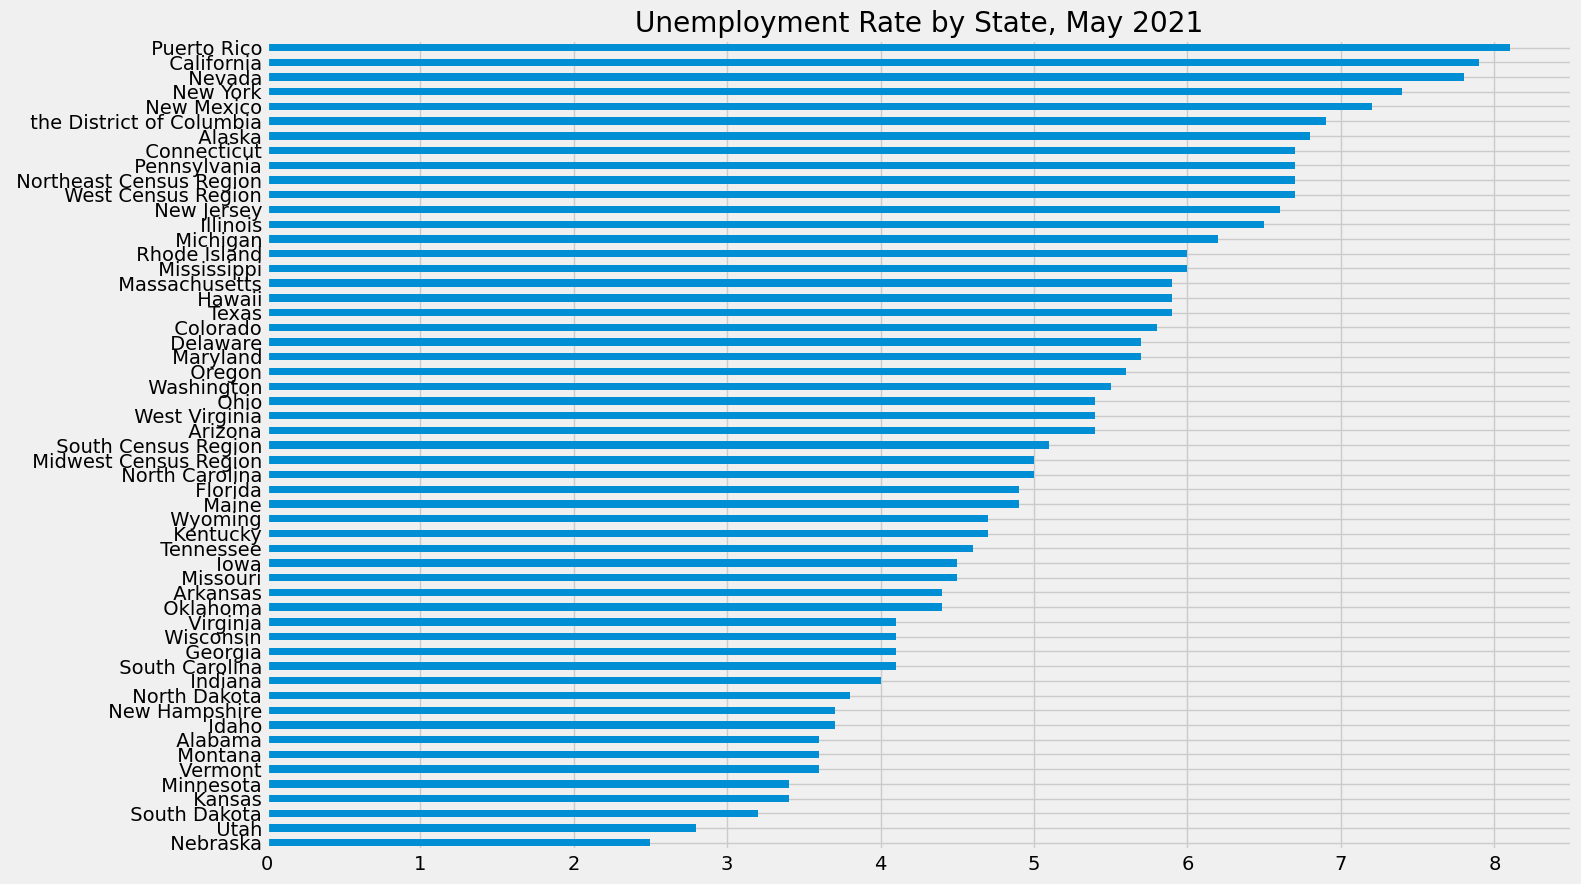

In [77]:
unemp_states.loc[unemp_states.index == '2021-05-01'].T.sort_values(by='2021-05-01')\
    .plot(kind='barh', figsize=(15,10), title='Unemployment Rate by State, May 2021', legend=False)

# 6. Pulling Participation Rate

In [78]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [79]:
part_df['title'].str.replace('Labor Force Participation Rate for ','')\
    .drop(part_df.index[(part_df.index.str.startswith('LN')) | (part_df.index.str.startswith('LR'))]).to_dict()


{'CIVPART': 'Labor Force Participation Rate',
 'LBSSA06': 'California',
 'LBSSA12': 'Florida',
 'LBSSA21': 'Kentucky',
 'LBSSA39': 'Ohio',
 'LBSSA27': 'Minnesota',
 'LBSSA08': 'Colorado',
 'LBSSA01': 'Alabama',
 'LBSSA55': 'Wisconsin',
 'LBSSA26': 'Michigan',
 'LBSSA48': 'Texas',
 'LBSSA37': 'North Carolina',
 'LBSSA49': 'Utah',
 'LBSSA13': 'Georgia',
 'LBSSA47': 'Tennessee',
 'LBSSA45': 'South Carolina',
 'LBSSA24': 'Maryland',
 'LBSSA36': 'New York',
 'LBSSA54': 'West Virginia',
 'LBSSA35': 'New Mexico',
 'LBSSA23': 'Maine',
 'LBSSA19': 'Iowa',
 'LBSSA18': 'Indiana',
 'LBSSA25': 'Massachusetts',
 'LBSSA51': 'Virginia',
 'LBSSA28': 'Mississippi',
 'LBSSA42': 'Pennsylvania',
 'LBSSA41': 'Oregon',
 'LBSSA34': 'New Jersey',
 'LBSSA04': 'Arizona',
 'LBSSA17': 'Illinois',
 'LBSSA22': 'Louisiana',
 'LBSSA40': 'Oklahoma',
 'LBSSA20': 'Kansas',
 'LBSSA33': 'New Hampshire',
 'LBSSA30': 'Montana',
 'LBSSA29': 'Missouri',
 'LBSSA05': 'Arkansas',
 'LBSSA16': 'Idaho',
 'LBSSA31': 'Nebraska',
 'LBS

In [80]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','')\
    .drop(part_df.index[(part_df.index.str.startswith('LN')) | (part_df.index.str.startswith('LR'))]).to_dict()
    
all_results = []
for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis=1)

In [81]:
part_states.drop(part_df.index[(part_df.index.str.startswith('LN')) | (part_df.index.str.startswith('LR'))], axis=1, inplace=True)

In [82]:
[part_id_to_state[c] for c in part_states.columns]

['Labor Force Participation Rate',
 'California',
 'Florida',
 'Kentucky',
 'Ohio',
 'Minnesota',
 'Colorado',
 'Alabama',
 'Wisconsin',
 'Michigan',
 'Texas',
 'North Carolina',
 'Utah',
 'Georgia',
 'Tennessee',
 'South Carolina',
 'Maryland',
 'New York',
 'West Virginia',
 'New Mexico',
 'Maine',
 'Iowa',
 'Indiana',
 'Massachusetts',
 'Virginia',
 'Mississippi',
 'Pennsylvania',
 'Oregon',
 'New Jersey',
 'Arizona',
 'Illinois',
 'Louisiana',
 'Oklahoma',
 'Kansas',
 'New Hampshire',
 'Montana',
 'Missouri',
 'Arkansas',
 'Idaho',
 'Nebraska',
 'Washington',
 'Nevada',
 'Hawaii',
 'Alaska',
 'Wyoming',
 'Connecticut',
 'North Dakota',
 'South Dakota',
 'Rhode Island',
 'District Of Columbia',
 'Vermont',
 'Delaware']

In [83]:
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

In [84]:
part_states.dropna(inplace=True)

In [85]:
part_states

,Labor Force Participation Rate,California,Florida,Kentucky,Ohio,Minnesota,Colorado,Alabama,Wisconsin,Michigan,Texas,North Carolina,Utah,Georgia,Tennessee,South Carolina,Maryland,New York,West Virginia,New Mexico,Maine,Iowa,Indiana,Massachusetts,Virginia,Mississippi,Pennsylvania,Oregon,New Jersey,Arizona,Illinois,Louisiana,Oklahoma,Kansas,New Hampshire,Montana,Missouri,Arkansas,Idaho,Nebraska,Washington,Nevada,Hawaii,Alaska,Wyoming,Connecticut,North Dakota,South Dakota,Rhode Island,District Of Columbia,Vermont,Delaware
1976-01-01,61.3,62.6,55.8,60.5,61.7,65.6,67.2,57.0,65.6,61.6,63.8,66.5,62.8,63.7,59.6,65.3,64.3,58.0,52.5,60.8,62.1,64.4,64.0,64.8,65.9,58.8,58.4,62.9,61.5,59.5,63.0,56.8,59.3,65.1,65.9,62.7,60.5,57.9,63.0,64.9,60.9,71.3,69.9,69.0,65.3,64.2,62.6,64.6,63.8,64.4,63.6,62.7
1976-02-01,61.3,62.4,55.7,60.3,61.7,65.5,67.0,56.9,65.5,61.5,63.5,66.3,62.6,63.6,59.4,65.2,64.2,58.0,52.4,60.5,61.9,64.3,63.9,64.7,65.8,58.6,58.3,62.7,61.4,59.2,63.0,56.6,59.2,65.0,65.6,62.5,60.3,57.8,62.8,64.9,60.7,70.8,69.6,68.4,64.9,64.1,62.4,64.4,63.7,64.5,63.4,62.5
1976-03-01,61.3,62.2,55.5,60.2,61.7,65.4,66.8,56.8,65.4,61.5,63.4,66.2,62.5,63.5,59.3,65.0,64.1,58.0,52.3,60.3,61.9,64.2,63.8,64.6,65.6,58.5,58.3,62.5,61.4,59.1,62.9,56.5,59.1,64.9,65.6,62.4,60.3,57.7,62.7,64.8,60.6,70.5,69.6,67.8,64.7,64.0,62.3,64.4,63.6,64.5,63.2,62.5
1976-04-01,61.6,62.2,55.5,60.1,61.6,65.4,66.6,56.8,65.4,61.6,63.5,66.2,62.5,63.5,59.3,64.9,64.1,58.0,52.3,60.3,61.8,64.1,63.8,64.6,65.5,58.5,58.3,62.4,61.5,59.1,62.9,56.4,59.0,65.0,65.7,62.3,60.4,57.7,62.7,64.8,60.6,70.4,69.4,67.9,64.9,64.1,62.5,64.3,63.7,64.5,63.5,62.4
1976-05-01,61.5,62.3,55.4,60.1,61.6,65.5,66.5,56.8,65.5,61.7,63.6,66.3,62.6,63.6,59.4,64.7,64.1,58.1,52.2,60.3,61.7,64.1,63.9,64.6,65.4,58.5,58.3,62.5,61.6,59.1,63.0,56.4,59.0,65.1,66.0,62.2,60.6,57.7,62.8,64.8,60.7,70.5,69.3,67.9,65.2,64.3,62.6,64.3,63.6,64.4,63.6,62.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,62.3,61.9,59.4,57.7,61.3,68.2,68.1,56.8,64.7,59.8,63.7,60.8,68.8,61.3,59.3,56.2,64.8,60.2,54.7,56.2,58.1,68.1,63.6,64.8,64.9,54.5,61.7,62.9,64.2,61.8,64.4,58.5,60.9,66.3,66.2,63.0,62.7,57.5,63.0,69.6,64.2,61.7,60.5,65.0,63.9,65.0,69.0,67.9,63.2,70.7,63.2,60.1
2022-10-01,62.2,62.0,59.4,57.5,61.2,68.2,68.1,56.8,64.6,59.8,63.7,60.7,68.7,61.2,59.1,56.0,64.8,60.3,54.6,56.2,58.0,68.1,63.5,64.8,65.0,54.4,61.7,63.0,64.1,61.8,64.4,58.5,60.9,66.3,66.1,62.9,62.7,57.5,62.9,69.6,64.3,61.6,60.5,65.1,63.9,64.9,69.0,67.8,63.0,70.4,63.2,60.0
2022-11-01,62.2,62.0,59.3,57.5,61.2,68.1,68.0,56.7,64.6,59.7,63.5,60.5,68.6,61.1,59.0,55.9,64.7,60.3,54.6,56.2,58.0,68.2,63.5,64.8,65.1,54.4,61.7,63.0,64.1,61.7,64.5,58.6,60.8,66.3,66.1,62.8,62.7,57.4,62.8,69.6,64.3,61.5,60.5,65.1,63.9,64.8,69.1,67.7,62.9,70.3,63.3,59.9
2022-12-01,62.3,61.9,59.1,57.5,61.2,68.1,68.0,56.7,64.6,59.7,63.4,60.5,68.5,61.0,58.9,55.8,64.6,60.4,54.7,56.2,58.0,68.2,63.4,64.7,65.1,54.4,61.7,62.9,64.1,61.6,64.5,58.6,60.7,66.3,66.0,62.6,62.7,57.4,62.7,69.5,64.2,61.5,60.5,65.1,63.8,64.8,69.1,67.6,62.9,70.4,63.4,59.8


# 7. Plot unemplyment vs Participation

In [86]:
unemp_states.columns = unemp_states.columns.str.strip()

In [87]:
unemp_states.rename(columns={'the District of Columbia':'District of Columbia'}, inplace=True)

C:\Users\ldanl\AppData\Local\Temp\ipykernel_21388\3768700934.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [88]:
unemp_states.columns

Index(['California', 'Florida', 'Texas', 'New York', 'Pennsylvania', 'Ohio',
       'North Carolina', 'Alabama', 'Michigan', 'Illinois', 'Kentucky',
       'Minnesota', 'Colorado', 'Georgia', 'Wisconsin', 'New Jersey',
       'Washington', 'Virginia', 'Massachusetts', 'West Virginia', 'Tennessee',
       'South Carolina', 'Alaska', 'Arkansas', 'Oregon', 'New Mexico',
       'Arizona', 'Utah', 'Indiana', 'Oklahoma', 'North Dakota', 'Iowa',
       'Missouri', 'Nevada', 'Maryland', 'Kansas', 'Puerto Rico', 'Montana',
       'Mississippi', 'Wyoming', 'Rhode Island', 'Connecticut', 'Hawaii',
       'South Dakota', 'Idaho', 'Maine', 'District of Columbia',
       'New Hampshire', 'Delaware', 'Nebraska', 'Midwest Census Region',
       'Vermont', 'South Census Region', 'Northeast Census Region',
       'West Census Region'],
      dtype='object')

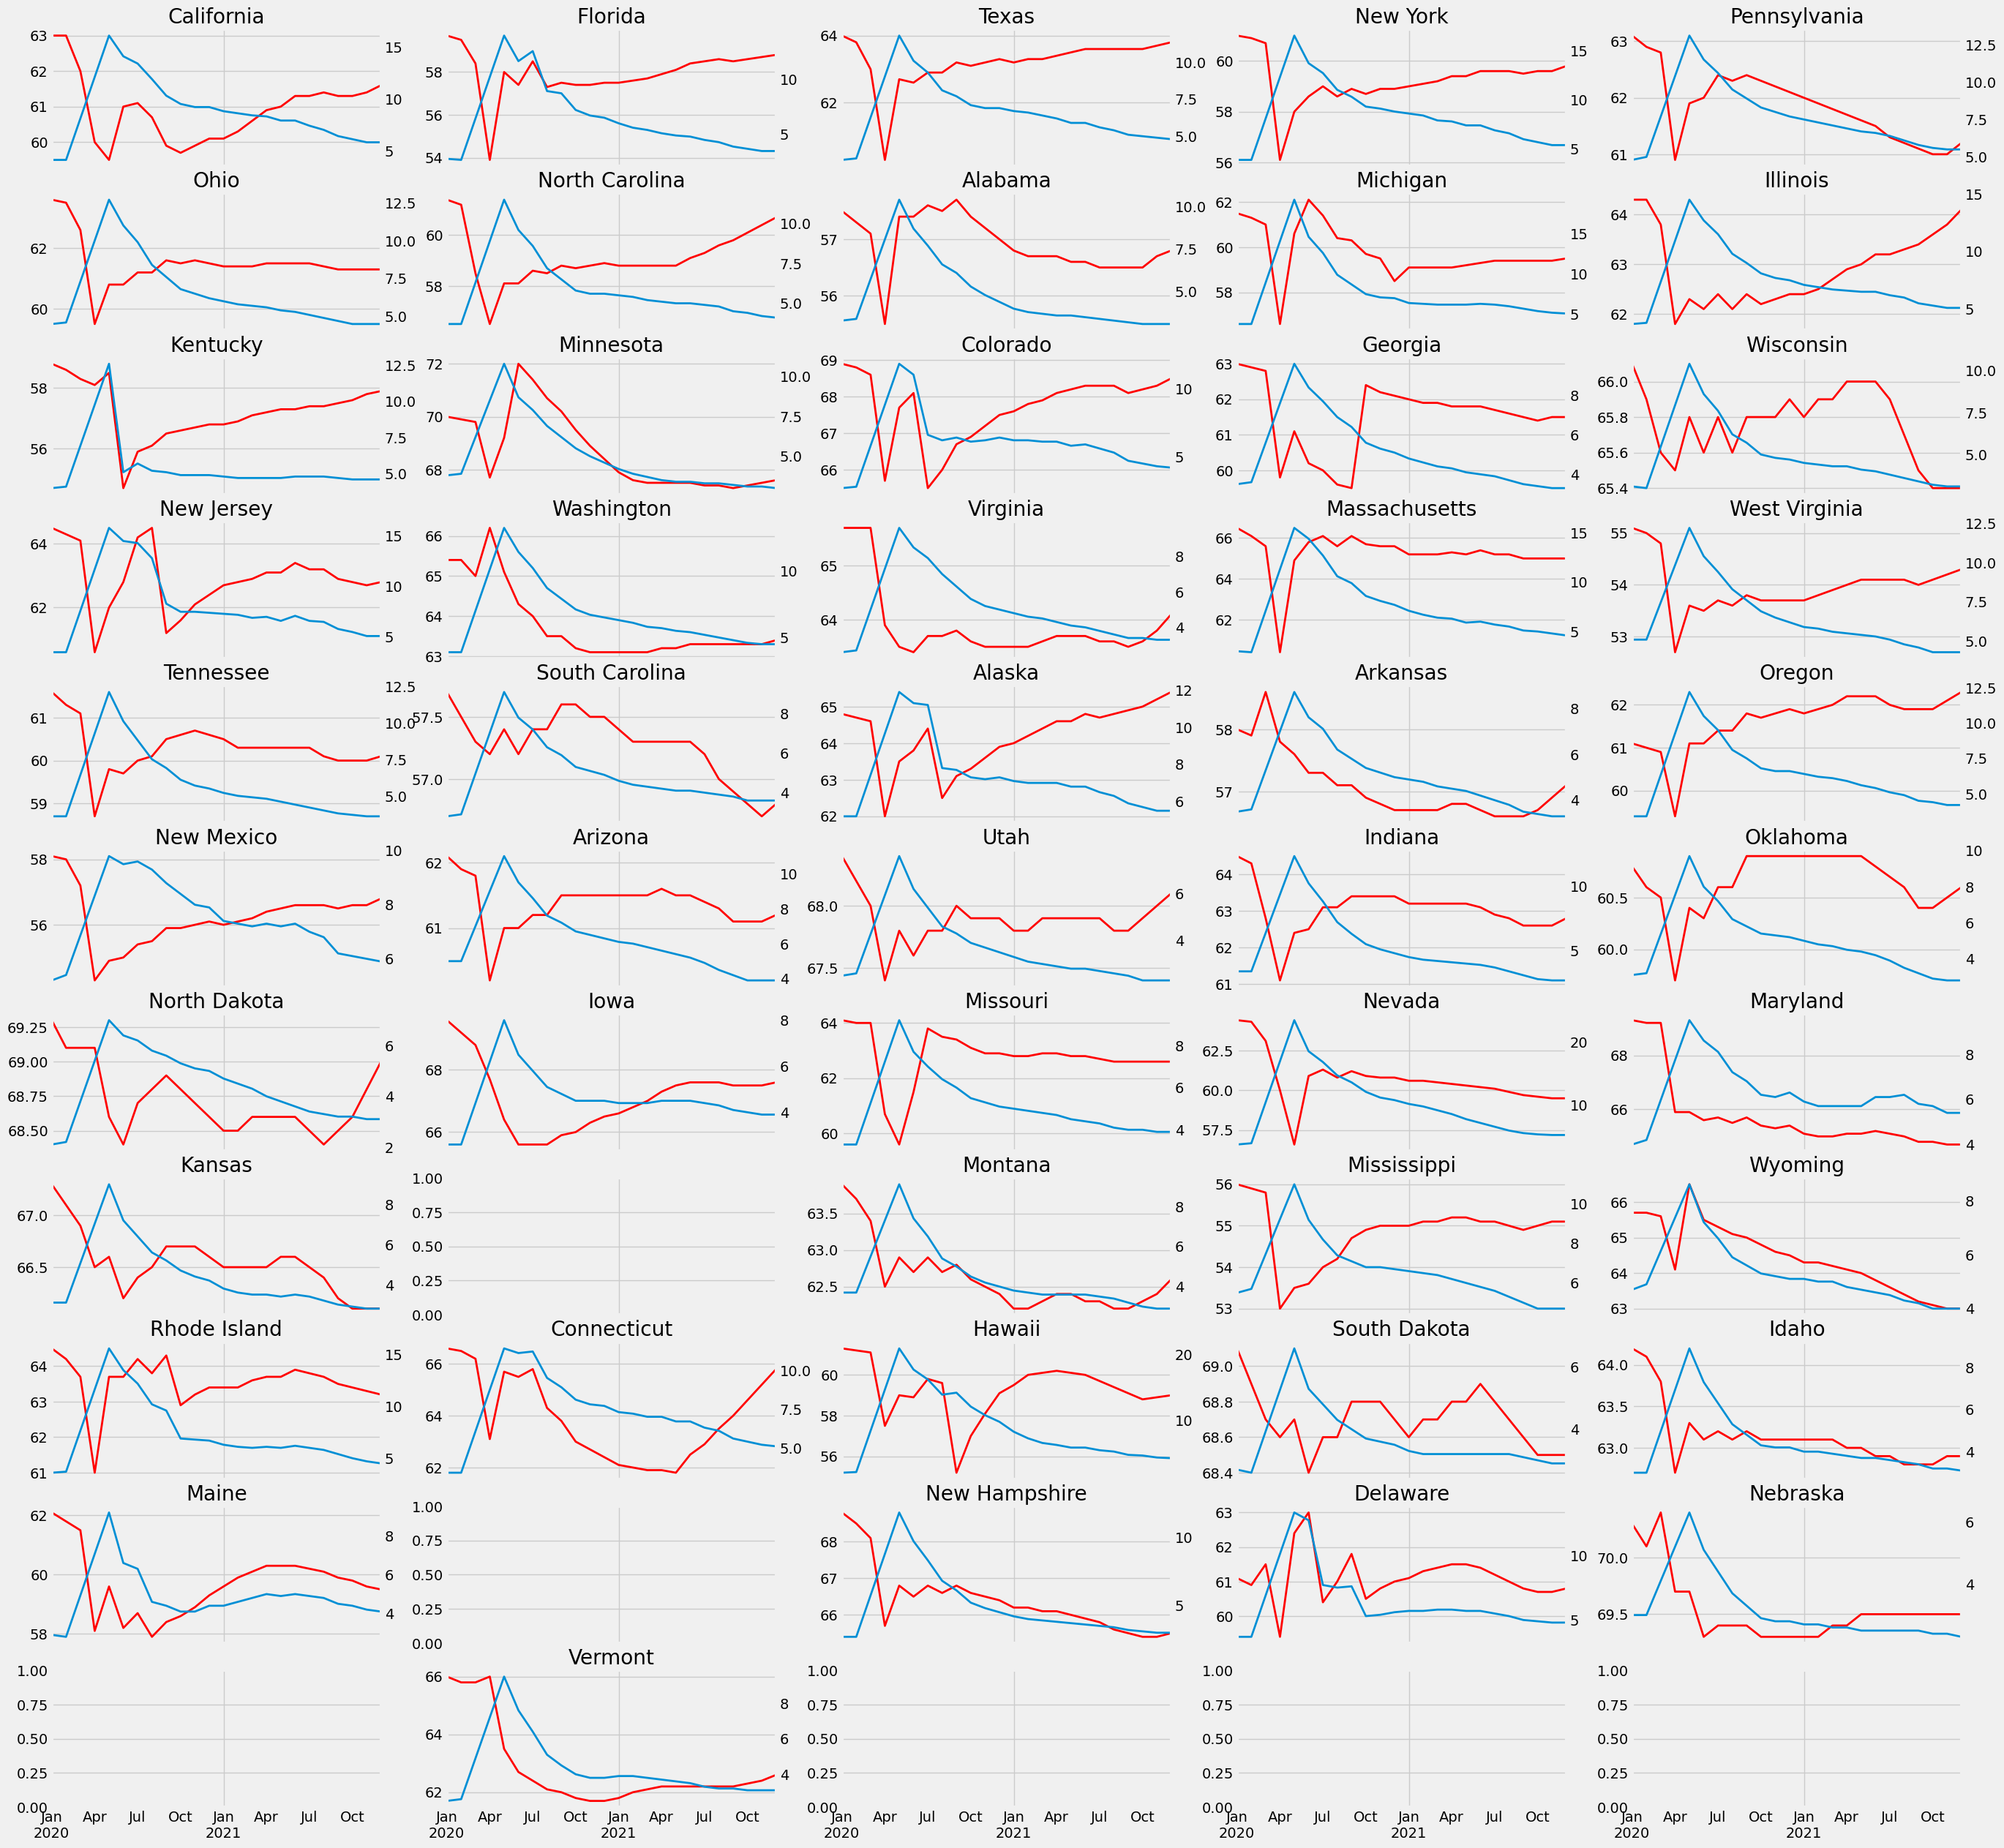

In [89]:
fig, axs = plt.subplots(11,5, figsize=(30,30), sharex=True)
axs = axs.flatten()

for i, state in enumerate(unemp_states.columns):
    if not state in part_states.columns or not state in unemp_states:
        continue
    ax2 = axs[i].twinx()
    part_states.query('index >= 2020 and index <2022')[state].plot(ax=axs[i], lw=2, label='Participation Rate', color='red')
    unemp_states.query('index >= 2020 and index <2022')[state].plot(ax=ax2, lw=2, label='Unemployment Rate')

    ax2.grid(False)
    axs[i].set_title(state)

In [90]:
part_states.columns

Index(['Labor Force Participation Rate', 'California', 'Florida', 'Kentucky',
       'Ohio', 'Minnesota', 'Colorado', 'Alabama', 'Wisconsin', 'Michigan',
       'Texas', 'North Carolina', 'Utah', 'Georgia', 'Tennessee',
       'South Carolina', 'Maryland', 'New York', 'West Virginia', 'New Mexico',
       'Maine', 'Iowa', 'Indiana', 'Massachusetts', 'Virginia', 'Mississippi',
       'Pennsylvania', 'Oregon', 'New Jersey', 'Arizona', 'Illinois',
       'Louisiana', 'Oklahoma', 'Kansas', 'New Hampshire', 'Montana',
       'Missouri', 'Arkansas', 'Idaho', 'Nebraska', 'Washington', 'Nevada',
       'Hawaii', 'Alaska', 'Wyoming', 'Connecticut', 'North Dakota',
       'South Dakota', 'Rhode Island', 'District Of Columbia', 'Vermont',
       'Delaware'],
      dtype='object')

Text(0.5, 1.0, 'New York Unemployment and Participation Rates')

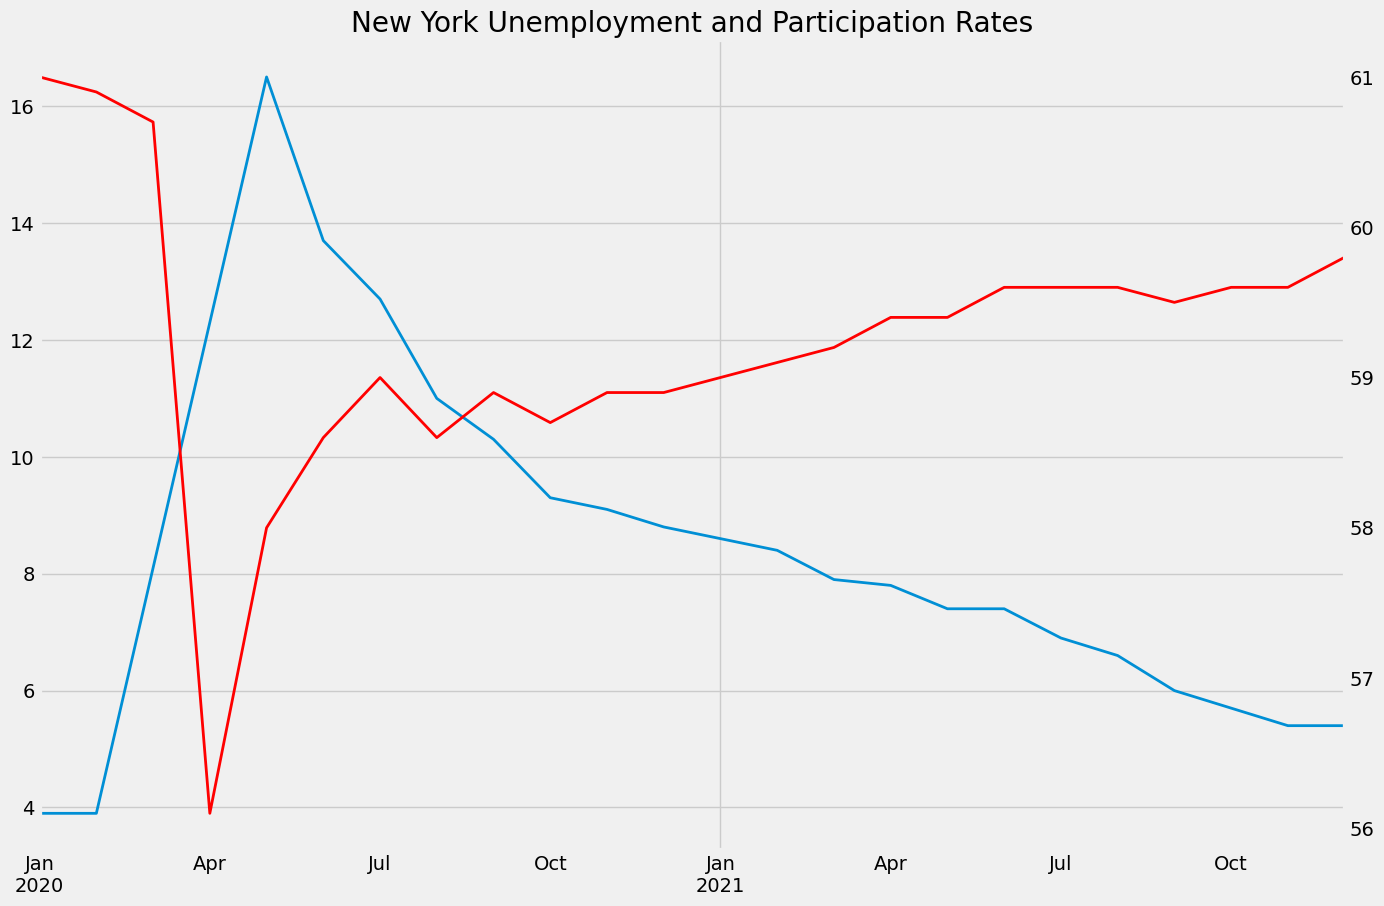

In [91]:
fig, ax = plt.subplots(figsize=(15,10))
ax2 = ax.twinx()
part_states.query('index >= 2020 and index <2022')['New York'].plot(ax=ax2, lw=2, label='Participation Rate', color='red')
unemp_states.query('index >= 2020 and index <2022')['New York'].plot(ax=ax, lw=2, label='Unemployment Rate')

ax2.grid(False)
ax.set_title('New York Unemployment and Participation Rates')